<a href="https://colab.research.google.com/github/NirvanaDogra/DataViz/blob/main/Dogra_Nirvana_Project_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab


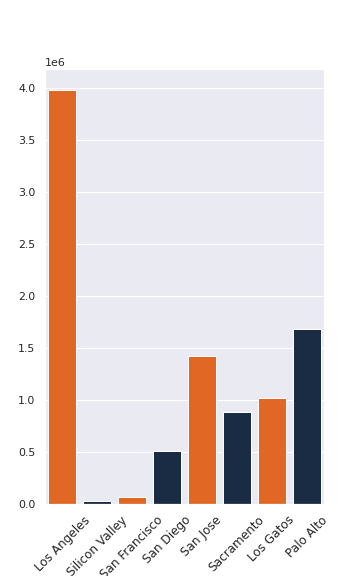
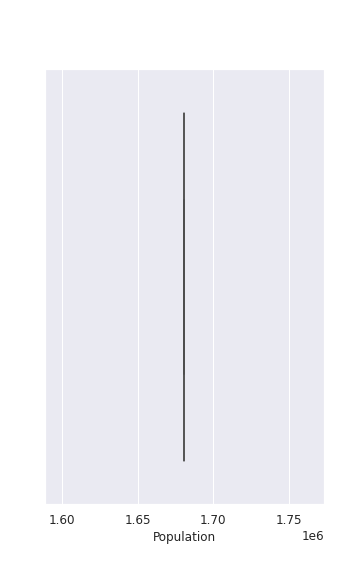
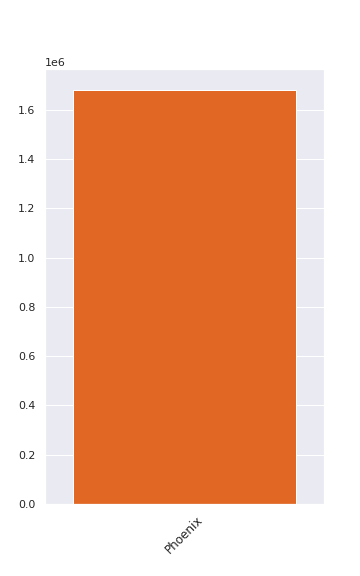
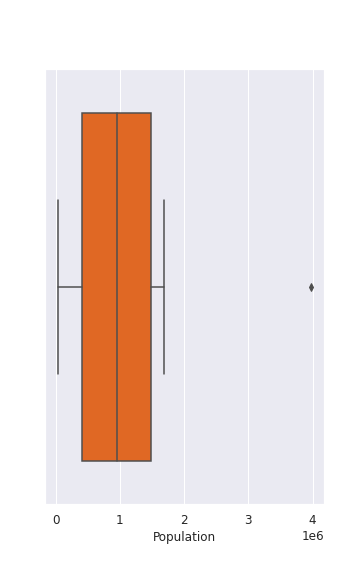
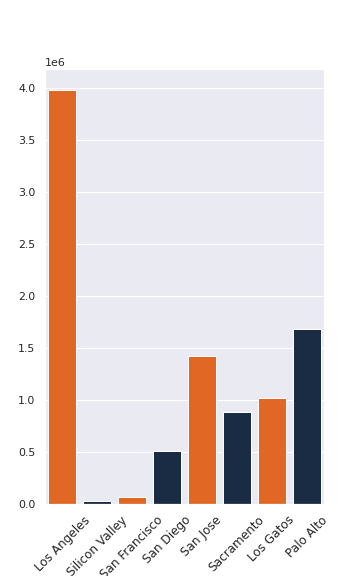
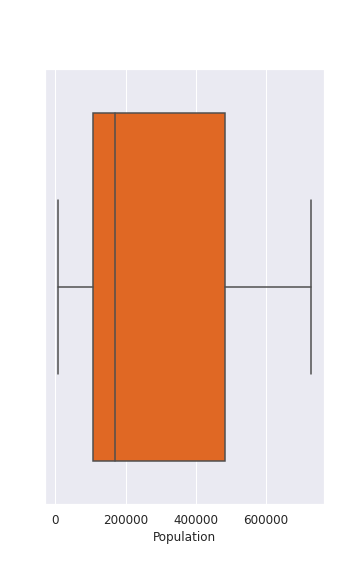
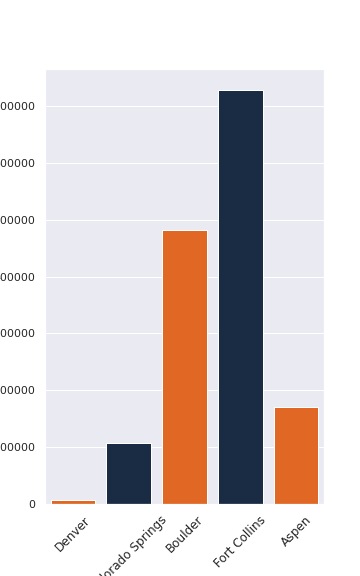
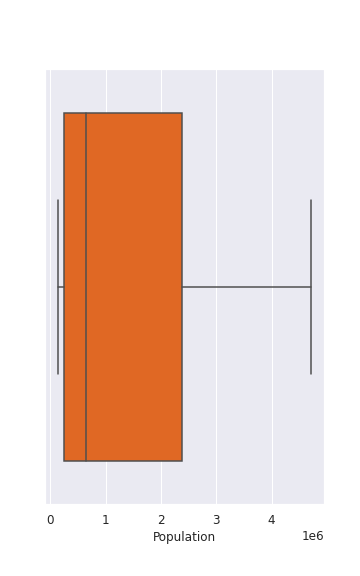
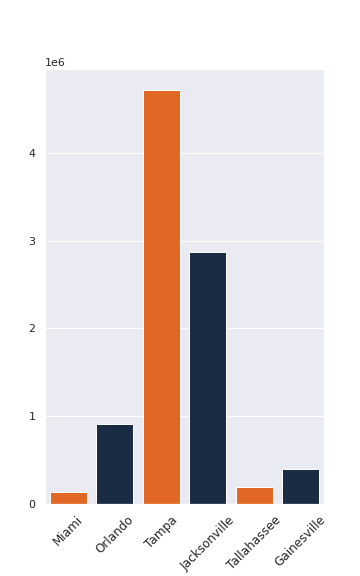
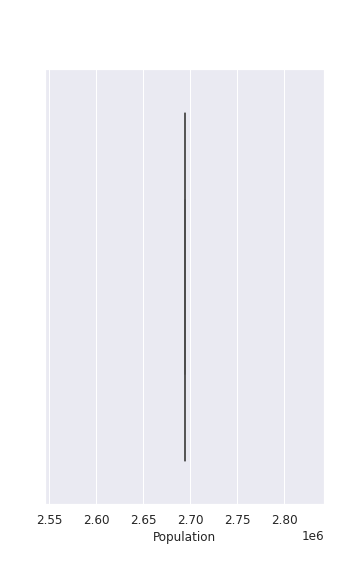
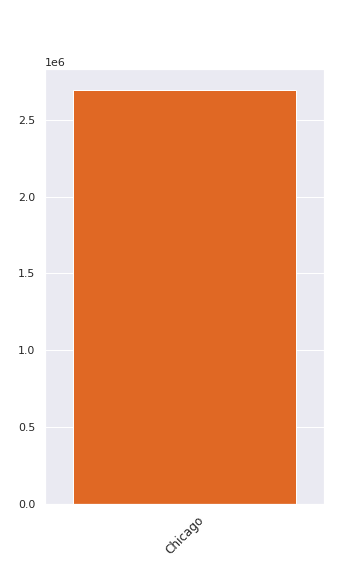
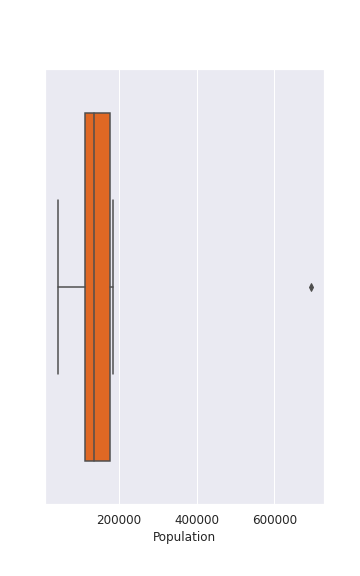
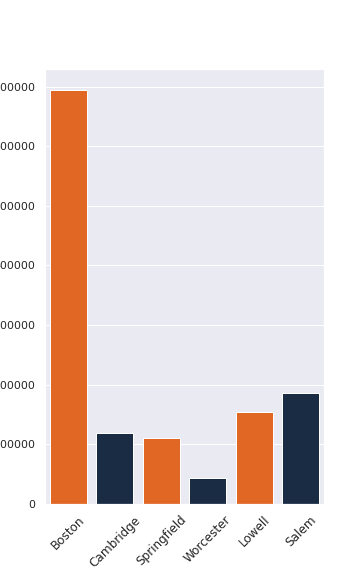
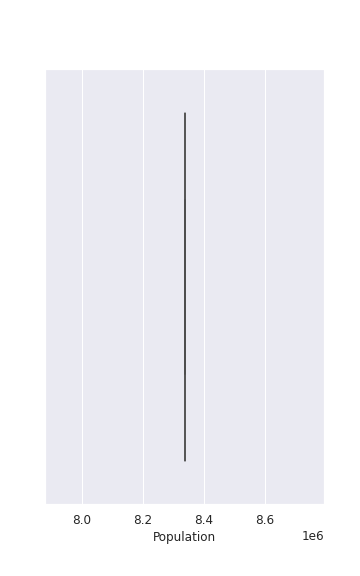
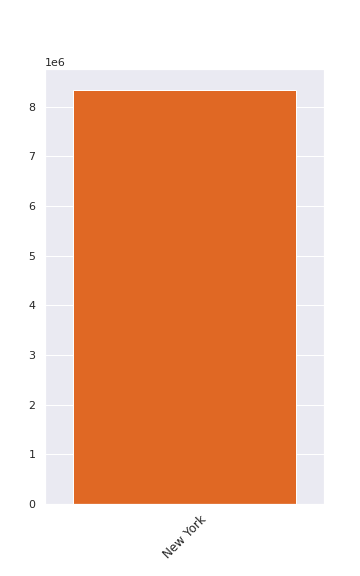
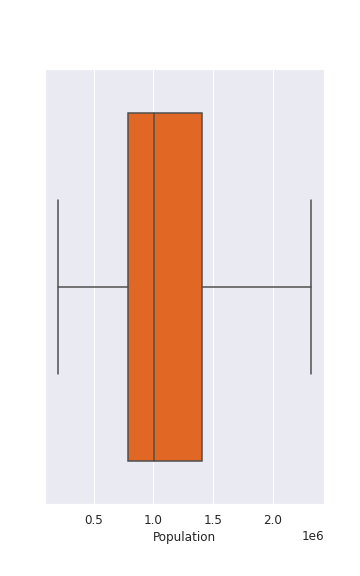
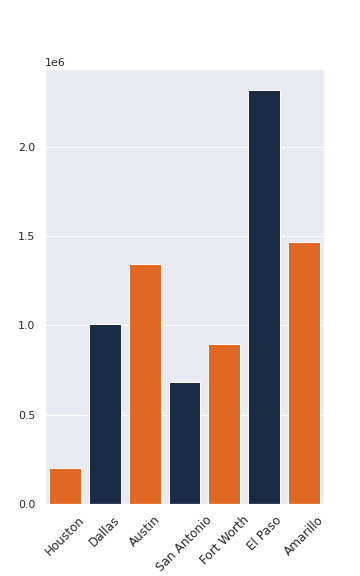
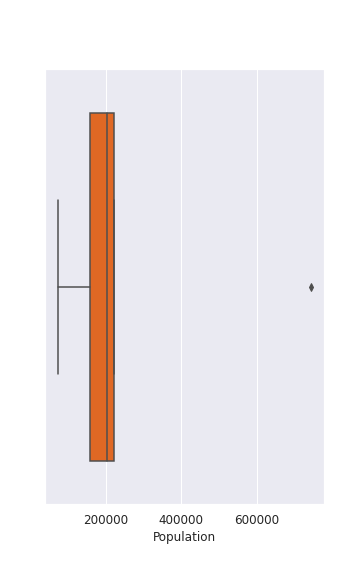
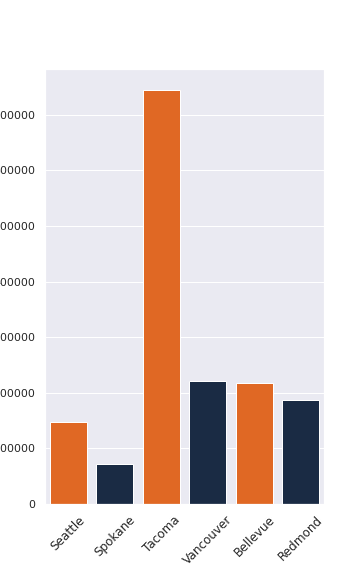
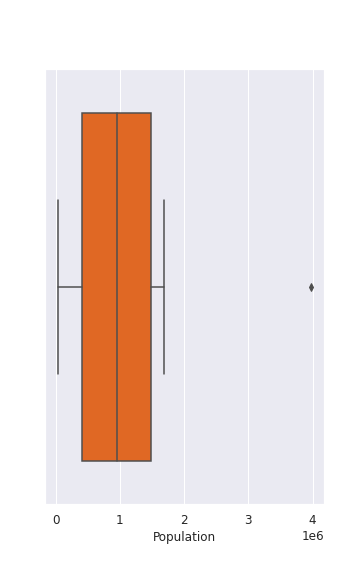

In [133]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
import matplotlib.colors as mcolors
pn.extension()

# make plots static
%matplotlib inline

#1) add a different data source instead of animal and rating, using anything else.  You can either
#     directly type data in or load a dataframe from a csv
df = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Silicon Valley', 
             'San Francisco', 'San Diego', 'San Jose', 'Sacramento', 'Los Gatos', 'Palo Alto',
             'Dallas', 'Austin', 'San Antonio', 'Fort Worth', 'El Paso', 'Amarillo',
             'Miami', 'Orlando', 'Tampa', 'Jacksonville', 'Tallahassee', 'Gainesville',
             'Boston', 'Cambridge', 'Springfield', 'Worcester', 'Lowell', 'Salem',
             'Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Redmond',
             'Denver', 'Colorado Springs', 'Boulder', 'Fort Collins', 'Aspen'],
    'Population': [8336817, 3979576, 2693976, 2320268, 1680992, 1680992,
                   883305, 1425976, 1021795, 513624, 30653, 70334,
                   1343573, 1006141, 1469845, 895008, 681728, 199826,
                   4716815, 2874421, 399700, 911507, 198007, 135214,
                   694583, 118977, 153947, 185877, 111346, 43715,
                   744955, 222081, 217827, 186192, 148164, 71929,
                   728455, 482436, 107360, 170243, 6658],
    'State': ['New York', 'California', 'Illinois', 'Texas', 'Arizona', 'California',
              'California', 'California', 'California', 'California', 'California', 'California',
              'Texas', 'Texas', 'Texas', 'Texas', 'Texas', 'Texas',
              'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida',
              'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts',
              'Washington', 'Washington', 'Washington', 'Washington', 'Washington', 'Washington',
              'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado']
})



class RatingsDashboard(param.Parameterized):
  
    state = param.ObjectSelector(default='California', objects=list(df.State.unique()))
    def get_data(self):
        class_df = df[(df.State==self.state)].copy()
        return class_df
    
    def box_view(self):
        data = self.get_data() 
        fig = plt.figure(figsize=(5, 8))
        ax = sns.boxplot(data['Population'])
        plt.close()
        return ax.figure

    #2) add an additional visualisation.  it can be a bar chart, column chart, line chart, anything really.  Do not remove 
#     the existing bar chart. 
    def bar_chart(self):
        data = self.get_data()
        cities = list(data['City'].unique())
        colors = ['#FF5F05', '#13294B'] * ((len(cities) // 2) + 1)
        fig = plt.figure(figsize=(5, 8))
        sns.set_palette(sns.color_palette(colors[:len(cities)]))
        ax = sns.barplot(x=cities, y=data.groupby('City').mean()['Population'].to_list(), data=data, palette=colors[:len(cities)])
        ax.set_title("Mean Population", color="white")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.close()
        return ax.figure
  
    def table_view(self):
        orange_blue_cmap = mcolors.ListedColormap(['#FF5F05', '#13294B', '#FF5F05', '#13294B', '#FF5F05', '#13294B'])
        df = self.get_data()
        temp_df = df.reset_index(drop=True)
        styled_table = temp_df.style.set_properties(**{'background-color': ['orange', 'blue']}).background_gradient(cmap=orange_blue_cmap)
        return styled_table.render()


rd = RatingsDashboard(name='')
dashboard_title = '# State Population Report'
dashboard_desc = 'An example of a simple interactive state Population Report'
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc, 
                      rd.param, 
                      pn.Row( rd.table_view,
                              rd.box_view, 
                              rd.bar_chart
                            )
                      )


dashboard.embed(max_opts = 5)